In [1]:
##Groupping Feature = Normal, SE and Worst
#For Now I focus only for Normal for this notebook, 
#Breast-V2-SE  -> for SE
#Breast-V2-Worst -> for Worst


#balancing data between M=1 and B=0

import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("breast.csv")

In [3]:
df.info() #check if there is missing data (null value) or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df = df.iloc[:, :-1] #drop the last column (error coloumn)

In [7]:
df.drop(labels='id', axis=1,inplace=True) #drop the id, because we don't need this, and has no usefull and meaning for prediction

In [8]:
df["diagnosis"].value_counts() # imbalance data

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
######### VISUALIZATION #################

In [10]:
#features_normal = ["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"]
features_normal = ["diagnosis","radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean","concave points_mean"]

features_se = ["diagnosis","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se"]
features_worst = ["diagnosis","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

In [11]:
dataset_normal = df[features_normal]
dataset_normal.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean
0,M,17.99,122.80,1001.0,0.27760,0.3001,0.14710
1,M,20.57,132.90,1326.0,0.07864,0.0869,0.07017
2,M,19.69,130.00,1203.0,0.15990,0.1974,0.12790
3,M,11.42,77.58,386.1,0.28390,0.2414,0.10520
4,M,20.29,135.10,1297.0,0.13280,0.1980,0.10430


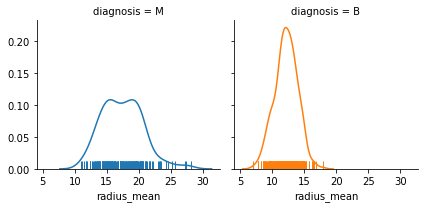

In [13]:
#Ploting relationship between radius_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "radius_mean", hist=False, rug=True)

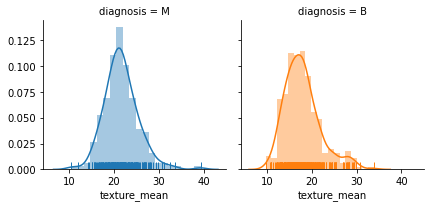

In [14]:
#Ploting relationship between texture_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "texture_mean", hist=True, rug=True)

In [ ]:
#Ploting relationship between perimeter_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "perimeter_mean", hist=True, rug=True)

In [ ]:
#Ploting relationship between area_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "area_mean", hist=True, rug=True)

In [ ]:
#Ploting relationship between smoothness_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "smoothness_mean", hist=True, rug=True)

In [ ]:
#Ploting relationship between compactness_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "compactness_mean", hist=True, rug=True)

In [ ]:
#Ploting relationship between concavity_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "concavity_mean", hist=True, rug=True)

In [ ]:
#Ploting relationship between concave point_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "concave points_mean", hist=True, rug=True)

In [ ]:
#Ploting relationship between symetry_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "symmetry_mean", hist=True, rug=True)


In [ ]:
#Ploting relationship between fractal_dimension_mean and diagnosis 
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "fractal_dimension_mean", hist=True, rug=True)

In [15]:
### It seems almost all data approximately symetry (base on display for each features normal), therefore no need to log 

In [ ]:
sns.pairplot(df,hue="diagnosis",vars = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"])

In [ ]:
## Looking for correlation between each features


#Explore correlations
plt.rcParams['figure.figsize']=(20,20)
sns.set(font_scale=1.4)
sns.heatmap(dataset_normal.drop('diagnosis', axis=1).corr(), cmap='coolwarm',annot=True)

In [13]:
#dataset_normal_no_target.head()
dataset_normal_modif = dataset_normal.copy()

In [14]:
dataset_normal_modif.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean
0,M,17.99,122.80,1001.0,0.27760,0.3001,0.14710
1,M,20.57,132.90,1326.0,0.07864,0.0869,0.07017
2,M,19.69,130.00,1203.0,0.15990,0.1974,0.12790
3,M,11.42,77.58,386.1,0.28390,0.2414,0.10520
4,M,20.29,135.10,1297.0,0.13280,0.1980,0.10430


In [15]:
#radius_mean
dataset_normal_mean = dataset_normal["radius_mean"].mean()
dataset_normal_std = dataset_normal["radius_mean"].std()
dataset_normal_modif["radius_mean"] = (dataset_normal["radius_mean"] - dataset_normal_mean)/dataset_normal_std

'''
#texture_mean
dataset_normal_mean = dataset_normal["texture_mean"].mean()
dataset_normal_std = dataset_normal["texture_mean"].std()
dataset_normal_modif["texture_mean"] = (dataset_normal["texture_mean"] - dataset_normal_mean)/dataset_normal_std
'''

#perimeter_mean
dataset_normal_mean = dataset_normal["perimeter_mean"].mean()
dataset_normal_std = dataset_normal["perimeter_mean"].std()
dataset_normal_modif["perimeter_mean"] = (dataset_normal["perimeter_mean"] - dataset_normal_mean)/dataset_normal_std

#area_mean
dataset_normal_mean = dataset_normal["area_mean"].mean()
dataset_normal_std = dataset_normal["area_mean"].std()
dataset_normal_modif["area_mean"] = (dataset_normal["area_mean"] - dataset_normal_mean)/dataset_normal_std

#others not normalize because they already under the range

In [16]:
dataset_normal_modif.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean
0,M,1.096100,1.268817,0.983510,0.27760,0.3001,0.14710
1,M,1.828212,1.684473,1.907030,0.07864,0.0869,0.07017
2,M,1.578499,1.565126,1.557513,0.15990,0.1974,0.12790
3,M,-0.768233,-0.592166,-0.763792,0.28390,0.2414,0.10520
4,M,1.748758,1.775011,1.824624,0.13280,0.1980,0.10430


In [17]:
Target= pd.get_dummies(dataset_normal["diagnosis"],drop_first=True)  #convert Malign to 1 and Benign to 0

dataset_normal_modif= pd.concat([dataset_normal_modif,Target],axis=1)

dataset_normal_modif.drop(labels='diagnosis', axis=1,inplace=True) #drop the diagnosis,because we have changed B/M to M's coloumn (numerical_number)

dataset_normal_modif.rename(columns={"M": "target"},inplace=True)  #rename for convinient name only

In [18]:
dataset_normal_modif[18:25]

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,target
18,1.612551,1.565126,1.719485,0.10270,0.14790,0.09498,1
19,-0.166653,-0.185565,-0.251735,0.08129,0.06664,0.04781,0
20,-0.297184,-0.260877,-0.383301,0.12700,0.04568,0.03110,0
21,-1.311926,-1.301661,-1.082620,0.06492,0.02956,0.02076,0
22,0.344124,0.433391,0.140690,0.21350,0.20770,0.09756,1
23,1.995633,1.861435,2.128675,0.10220,0.10970,0.08632,1
24,0.715855,0.742046,0.709579,0.14570,0.15250,0.09170,1


In [19]:
#Shuffle data
np.random.seed(0)
shuffle_df = dataset_normal_modif.reindex(np.random.permutation(dataset_normal_modif.index))

In [20]:
#n_train
ukuran_train=0.6
ukuran_validation=0.2

total = len(shuffle_df)
n_train = int (ukuran_train*total)
n_validation = int (ukuran_validation*total)
n_test = total-n_train-n_validation

print (total)
print (n_train)
print (n_validation)
print (n_test)

569
341
113
115


In [21]:
#split train_test
df_train = shuffle_df[0:n_train]
df_valid = shuffle_df[n_train:n_train+n_validation]
df_test= shuffle_df[n_train+n_validation:]


In [22]:
df_train["target"].value_counts()

0    218
1    123
Name: target, dtype: int64

In [23]:
#setting imbalance data B=0=63% and M=1=37%
df_dummy = df_train.sort_values(by='target') #sorting 0 and 1
nilai_0 = (df_dummy["target"]==0).sum()
nilai_1 = (df_dummy["target"]==1).sum()

print ("Nilai 0 : ",nilai_0)
print ("Nilai 1 : ",nilai_1)

persen = float ((nilai_1)/(nilai_0))
bnyk_0 = int( persen*nilai_0)


df_smt = df_dummy[0:bnyk_0]
#print (len (df_high_smt))
df_high_smt = df_dummy[nilai_0:]
#df_high_smt

#df_smt.tail()
print()
print ("df_smt : ",len(df_smt))
print ("df_high_smt : ",len(df_high_smt))
#df_smt.tail()
df_high_smt.tail()
#df_dummy[216:220]

Nilai 0 :  218
Nilai 1 :  123

df_smt :  122
df_high_smt :  123


,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,target
54,0.276020,0.217744,0.164560,0.07081,0.05253,0.03334,1
30,1.277709,1.351125,1.230729,0.18870,0.23190,0.12440,1
100,-0.146789,-0.161284,-0.205133,0.08511,0.08625,0.04489,1
392,0.386688,0.429276,0.255207,0.15620,0.18910,0.09113,1
35,0.741394,0.746162,0.609839,0.13360,0.13480,0.06018,1


In [24]:
df_smt = pd.concat([df_smt,df_high_smt],axis=0)
print (len(df_smt))

245


In [25]:
df_smt.tail()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,target
54,0.276020,0.217744,0.164560,0.07081,0.05253,0.03334,1
30,1.277709,1.351125,1.230729,0.18870,0.23190,0.12440,1
100,-0.146789,-0.161284,-0.205133,0.08511,0.08625,0.04489,1
392,0.386688,0.429276,0.255207,0.15620,0.18910,0.09113,1
35,0.741394,0.746162,0.609839,0.13360,0.13480,0.06018,1


In [26]:
np.random.seed(0)
shuffle_df_train = df_smt.reindex(np.random.permutation(df_smt.index))

In [27]:
shuffle_df_train.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,target
347,0.179540,0.119386,0.039245,0.07780,0.04608,0.035280,0
408,1.096100,1.063047,0.957083,0.13040,0.12010,0.088240,1
561,-0.830662,-0.876540,-0.764076,0.03558,0.00000,0.000000,0
346,-0.586624,-0.630028,-0.595569,0.05794,0.00751,0.008488,0
31,-0.649052,-0.577762,-0.608924,0.15160,0.12180,0.051820,1


In [28]:
X_train = shuffle_df_train.drop(labels='target', axis=1)
Y_train = shuffle_df_train["target"]


In [29]:
X_validation = df_valid.drop(labels='target', axis=1)
Y_validation = df_valid["target"]

X_test = df_test.drop(labels='target', axis=1)
Y_test = df_test["target"]


In [30]:
X_train.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean
347,0.179540,0.119386,0.039245,0.07780,0.04608,0.035280
408,1.096100,1.063047,0.957083,0.13040,0.12010,0.088240
561,-0.830662,-0.876540,-0.764076,0.03558,0.00000,0.000000
346,-0.586624,-0.630028,-0.595569,0.05794,0.00751,0.008488
31,-0.649052,-0.577762,-0.608924,0.15160,0.12180,0.051820


In [31]:
#create a model
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(units=24 ,activation='relu',input_shape=(10, )))
model.add(tf.keras.layers.Dense(units=24 ,activation='relu',input_shape=(6, )))

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=24 ,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1,activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                168       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 793
Trainable params: 793
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [40]:
epochs_hist = model.fit(X_train,Y_train, epochs=350,validation_data=(X_validation, Y_validation))

Train on 245 samples, validate on 113 samples
Epoch 1/350
245/245 [==============================] - 0s 2ms/sample - loss: 0.2985 - accuracy: 0.8735 - val_loss: 0.2715 - val_accuracy: 0.8850
Epoch 2/350
245/245 [==============================] - 0s 114us/sample - loss: 0.2809 - accuracy: 0.8735 - val_loss: 0.2696 - val_accuracy: 0.8850
Epoch 3/350
245/245 [==============================] - 0s 163us/sample - loss: 0.2802 - accuracy: 0.8735 - val_loss: 0.2674 - val_accuracy: 0.8850
Epoch 4/350
245/245 [==============================] - 0s 139us/sample - loss: 0.2902 - accuracy: 0.8694 - val_loss: 0.2663 - val_accuracy: 0.8850
Epoch 5/350
245/245 [==============================] - 0s 127us/sample - loss: 0.2947 - accuracy: 0.8735 - val_loss: 0.2651 - val_accuracy: 0.8850
Epoch 6/350
245/245 [==============================] - 0s 122us/sample - loss: 0.3080 - accuracy: 0.8735 - val_loss: 0.2656 - val_accuracy: 0.8850
Epoch 7/350
245/245 [==============================] - 0s 122us/sample - l

245/245 [==============================] - 0s 167us/sample - loss: 0.2594 - accuracy: 0.9061 - val_loss: 0.2403 - val_accuracy: 0.9115
Epoch 57/350
245/245 [==============================] - 0s 188us/sample - loss: 0.2809 - accuracy: 0.8857 - val_loss: 0.2383 - val_accuracy: 0.9115
Epoch 58/350
245/245 [==============================] - 0s 184us/sample - loss: 0.2600 - accuracy: 0.8939 - val_loss: 0.2373 - val_accuracy: 0.9115
Epoch 59/350
245/245 [==============================] - 0s 184us/sample - loss: 0.2499 - accuracy: 0.8898 - val_loss: 0.2363 - val_accuracy: 0.9115
Epoch 60/350
245/245 [==============================] - 0s 155us/sample - loss: 0.2578 - accuracy: 0.8939 - val_loss: 0.2363 - val_accuracy: 0.9115
Epoch 61/350
245/245 [==============================] - 0s 180us/sample - loss: 0.2442 - accuracy: 0.9020 - val_loss: 0.2352 - val_accuracy: 0.9115
Epoch 62/350
245/245 [==============================] - 0s 167us/sample - loss: 0.2626 - accuracy: 0.8939 - val_loss: 0.2338 

245/245 [==============================] - 0s 208us/sample - loss: 0.2301 - accuracy: 0.9265 - val_loss: 0.1998 - val_accuracy: 0.9292
Epoch 112/350
245/245 [==============================] - 0s 216us/sample - loss: 0.2224 - accuracy: 0.9224 - val_loss: 0.2015 - val_accuracy: 0.9204
Epoch 113/350
245/245 [==============================] - 0s 233us/sample - loss: 0.2327 - accuracy: 0.9184 - val_loss: 0.2019 - val_accuracy: 0.9204
Epoch 114/350
245/245 [==============================] - 0s 224us/sample - loss: 0.2302 - accuracy: 0.9061 - val_loss: 0.2038 - val_accuracy: 0.9204
Epoch 115/350
245/245 [==============================] - 0s 192us/sample - loss: 0.2289 - accuracy: 0.9143 - val_loss: 0.2005 - val_accuracy: 0.9204
Epoch 116/350
245/245 [==============================] - 0s 180us/sample - loss: 0.2163 - accuracy: 0.9102 - val_loss: 0.1984 - val_accuracy: 0.9204
Epoch 117/350
245/245 [==============================] - 0s 171us/sample - loss: 0.2238 - accuracy: 0.9184 - val_loss: 0

245/245 [==============================] - 0s 164us/sample - loss: 0.2078 - accuracy: 0.9265 - val_loss: 0.2021 - val_accuracy: 0.9115
Epoch 167/350
245/245 [==============================] - 0s 196us/sample - loss: 0.2134 - accuracy: 0.9224 - val_loss: 0.2008 - val_accuracy: 0.9115
Epoch 168/350
245/245 [==============================] - 0s 220us/sample - loss: 0.2018 - accuracy: 0.9306 - val_loss: 0.1984 - val_accuracy: 0.9115
Epoch 169/350
245/245 [==============================] - 0s 245us/sample - loss: 0.2119 - accuracy: 0.9184 - val_loss: 0.2002 - val_accuracy: 0.9115
Epoch 170/350
245/245 [==============================] - 0s 224us/sample - loss: 0.2033 - accuracy: 0.9184 - val_loss: 0.2006 - val_accuracy: 0.9115
Epoch 171/350
245/245 [==============================] - 0s 241us/sample - loss: 0.2118 - accuracy: 0.9347 - val_loss: 0.2027 - val_accuracy: 0.9115
Epoch 172/350
245/245 [==============================] - 0s 241us/sample - loss: 0.2129 - accuracy: 0.9224 - val_loss: 0

245/245 [==============================] - 0s 176us/sample - loss: 0.2025 - accuracy: 0.9347 - val_loss: 0.2078 - val_accuracy: 0.9027
Epoch 222/350
245/245 [==============================] - 0s 196us/sample - loss: 0.1909 - accuracy: 0.9347 - val_loss: 0.2065 - val_accuracy: 0.9027
Epoch 223/350
245/245 [==============================] - 0s 192us/sample - loss: 0.2062 - accuracy: 0.9306 - val_loss: 0.2074 - val_accuracy: 0.9027
Epoch 224/350
245/245 [==============================] - 0s 193us/sample - loss: 0.2080 - accuracy: 0.9306 - val_loss: 0.2062 - val_accuracy: 0.9027
Epoch 225/350
245/245 [==============================] - 0s 200us/sample - loss: 0.2037 - accuracy: 0.9306 - val_loss: 0.2061 - val_accuracy: 0.9027
Epoch 226/350
245/245 [==============================] - 0s 196us/sample - loss: 0.1984 - accuracy: 0.9184 - val_loss: 0.2069 - val_accuracy: 0.9027
Epoch 227/350
245/245 [==============================] - 0s 188us/sample - loss: 0.2135 - accuracy: 0.9265 - val_loss: 0

245/245 [==============================] - 0s 135us/sample - loss: 0.2023 - accuracy: 0.9265 - val_loss: 0.2082 - val_accuracy: 0.9027
Epoch 277/350
245/245 [==============================] - 0s 143us/sample - loss: 0.2137 - accuracy: 0.9265 - val_loss: 0.2093 - val_accuracy: 0.9027
Epoch 278/350
245/245 [==============================] - 0s 159us/sample - loss: 0.1925 - accuracy: 0.9306 - val_loss: 0.2106 - val_accuracy: 0.9027
Epoch 279/350
245/245 [==============================] - 0s 139us/sample - loss: 0.1962 - accuracy: 0.9224 - val_loss: 0.2124 - val_accuracy: 0.9027
Epoch 280/350
245/245 [==============================] - 0s 127us/sample - loss: 0.1960 - accuracy: 0.9306 - val_loss: 0.2107 - val_accuracy: 0.9027
Epoch 281/350
245/245 [==============================] - 0s 135us/sample - loss: 0.2118 - accuracy: 0.9224 - val_loss: 0.2111 - val_accuracy: 0.9027
Epoch 282/350
245/245 [==============================] - 0s 155us/sample - loss: 0.2056 - accuracy: 0.9224 - val_loss: 0

245/245 [==============================] - 0s 204us/sample - loss: 0.1928 - accuracy: 0.9347 - val_loss: 0.2095 - val_accuracy: 0.9115
Epoch 331/350
245/245 [==============================] - 0s 184us/sample - loss: 0.1881 - accuracy: 0.9347 - val_loss: 0.2089 - val_accuracy: 0.9115
Epoch 332/350
245/245 [==============================] - 0s 196us/sample - loss: 0.2035 - accuracy: 0.9306 - val_loss: 0.2074 - val_accuracy: 0.9115
Epoch 333/350
245/245 [==============================] - 0s 196us/sample - loss: 0.1931 - accuracy: 0.9388 - val_loss: 0.2109 - val_accuracy: 0.9115
Epoch 334/350
245/245 [==============================] - 0s 192us/sample - loss: 0.1854 - accuracy: 0.9347 - val_loss: 0.2109 - val_accuracy: 0.9115
Epoch 335/350
245/245 [==============================] - 0s 216us/sample - loss: 0.1984 - accuracy: 0.9265 - val_loss: 0.2075 - val_accuracy: 0.9115
Epoch 336/350
245/245 [==============================] - 0s 171us/sample - loss: 0.1988 - accuracy: 0.9347 - val_loss: 0

In [41]:
#print('\nhistory dict:', epochs_hist.history)
X_test.tail()


,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean
277,1.328786,1.190625,1.270511,0.05884,0.0802,0.05843
9,-0.473118,-0.329192,-0.508616,0.23960,0.2273,0.08543
359,-1.331222,-1.323061,-1.069264,0.05956,0.0271,0.01406
192,-1.250633,-1.285611,-1.042269,0.02344,0.0000,0.00000
559,-0.742695,-0.718097,-0.714348,0.10210,0.1112,0.04105


In [42]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X_test, Y_test)
print('test loss, test acc:', results)

awal =10
akhir=20

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions')
predictions = model.predict(X_test)
print (predictions[awal:akhir], Y_test[awal:akhir])


# Evaluate on test data
115/115 [==============================] - 0s 104us/sample - loss: 0.2095 - accuracy: 0.8696
test loss, test acc: [0.20950557861639105, 0.8695652]

# Generate predictions
[[9.9996865e-01]
 [6.3324451e-01]
 [3.8295446e-03]
 [5.8326512e-03]
 [8.7948978e-01]
 [2.2921521e-04]
 [4.8624896e-02]
 [3.4896236e-02]
 [1.6756939e-02]
 [9.9999917e-01]] 451    1
123    0
222    0
419    0
62     1
568    0
377    0
130    0
187    0
23     1
Name: target, dtype: uint8


In [43]:
confusion = tf.math.confusion_matrix(labels=Y_test, predictions=predictions,
                                              num_classes=2)

In [44]:
print (confusion) 

tf.Tensor(
[[71  0]
 [39  5]], shape=(2, 2), dtype=int32)


In [ ]:
#it's very dangerous (Error Type 2, have cancer but detected no)